In [1]:
%matplotlib inline  

import numpy as np
from mnist.mnist import load_mnist
import pickle

In [2]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

def softmax(x):
    if x.ndim == 2:
        x = x - np.max(x, axis=1).reshape(-1,1)
        x = np.exp(x) / np.sum(np.exp(x), axis=1). reshape(-1,1)
    else:
        x = x - np.max(x)
        x = np.exp(x) / np.sum(np.exp(x))
        
    return x



In [3]:
def setup_network():
    with open("22-fnn-mnist-2layer-sig.pkl", 'rb') as f:
        net = pickle.load(f)
    return net

test_net = setup_network()
W1 = test_net['W1']; 
print(W1)

[[-0.00391574  0.00235982  0.15405002 ...  0.07643579  0.04048303
   0.17894486]
 [ 0.1048934  -0.03625136 -0.07409769 ...  0.15310726  0.07670112
   0.04780273]
 [-0.23270108 -0.02838503  0.03953473 ... -0.06615517 -0.0363144
   0.1027033 ]
 ...
 [-0.05065644  0.04485779 -0.16198439 ... -0.06044266 -0.01613528
   0.02149604]
 [-0.13772163  0.02926289  0.03767156 ... -0.15479492 -0.02446951
  -0.02706205]
 [-0.03207722 -0.03754213  0.14087992 ... -0.02328948  0.19048743
  -0.03575524]]


In [4]:
def predict(net, input):
    w1, w2 = net['W1'], net['W2']
    b1, b2 = net['b1'], net['b2']
    
    v1 = np.dot(input, w1) + b1
    h1 = sigmoid(v1)
    
    v2 = np.dot(h1, w2) + b2
    h2 = sigmoid(v2)
    
    y = softmax(h2)
    return y

In [5]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True,
                                                  flatten=True,
                                                  one_hot_label=False)
# 네트워크 생성
FNN = setup_network()

In [6]:
acc = 0
for i in range(len(x_train)):
    y = predict(FNN, x_train[i])
    y = np.argmax(y)
    if y == d_train[i]:
        acc += 1
        
train_sample = float(acc)/len(x_train)
print("훈련샘플 정확도 :", train_sample)

acc = 0
for i in range(len(x_test)):
    y = predict(FNN, x_test[i])
    y = np.argmax(y)
    if y == d_test[i]:
        acc += 1
        
test_sample = float(acc) / len(x_test)
print("테스트샘플 정확도", test_sample)


훈련샘플 정확도 : 0.87725
테스트샘플 정확도 0.8836


In [7]:
acc = 0
batch = 100
acc_fail = 0
acc_fail2 = 0

for i in range(0,len(x_train), batch):
    y = predict(FNN, x_train[i:i+batch])
    y = np.argmax(y, axis=1)
    acc_fail += np.sum(y != d_train[i : i+batch])
    
for i in range(0, len(x_test), batch):
    y = predict(FNN, x_test[i : i+batch])
    y = np.argmax(y, axis=1)
    acc_fail2 += np.sum(y != d_test[i:i+batch])
    
    
print("훈련 샘플의 분류 실패 확률:", float(acc_fail) / int(len(x_train)))
print("시험 샘플의 분류 실패 확률:", float(acc_fail2) / int(len(x_test)))

훈련 샘플의 분류 실패 확률: 0.12275
시험 샘플의 분류 실패 확률: 0.1164


In [8]:
acc = 0
batch = 100

for i in range(0, len(x_test), batch):
    y = predict(FNN, x_test[i:i+batch])
    y = np.argmax(y, axis=1)
    acc += np.sum(y != d_test[i:i+batch])
    
print(acc)

1164


In [9]:
acc = 0
a = np.array([[2,2,3], [3,4,5]])
b = np.array([[1,3,2], [3,2,5]])
acc += np.sum(a != b)
print(acc)

4


In [27]:
def classify(input):
    x = predict(FNN, x_test[input])
    y = np.argmax(x)
    return y

In [10]:
def fail_list():
    arr = []
    for i in range(len(x_test)):
        y = predict(FNN, x_test[i])
        y = np.argmax(y)
        if y != d_test[i]:
            arr.append(i)

    return arr

fail_list, y = fail_list()
print(len(fail_list))

1164


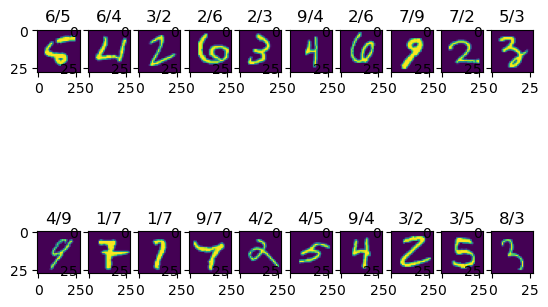

In [32]:
import matplotlib.pyplot as plt

def fail_list20(list):
    
    j = 1
    for i in range(len(list)):
        add = classify(fail_list[i])
        plt.subplot(2,10, j)
        label = d_test[fail_list[i]]
        img = x_test[fail_list[i]]
        img = img.reshape(28,28)
        plt.imshow(img)
        
        plt.title("%d/%d" % (int(add), int(label)))
        j += 1
        
        
fail_list20(fail_list[0:20])

In [12]:
i = 0
batch = 100
print(d_test[i:i+batch])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


In [35]:
a = predict(FNN, x_test[1000])
print(a)
b = np.argmax(a)
print(b)

[0.0738347  0.07827174 0.07396138 0.10173513 0.08484449 0.07432075
 0.07384494 0.17976995 0.07473591 0.18468102]
9
